In [512]:
import numpy as np
import pandas as pd
import sys, os, re, random, statistics
import matplotlib
matplotlib.rcParams['xtick.labelsize'] = 32
matplotlib.rcParams['ytick.labelsize'] = 32
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

### Scheduling Analysis

In [383]:
df_logtime4 = pd.read_csv("./logTime_4runtimes_5.csv")
df_stoic = pd.read_csv("./logTime_stoic_2.csv")

In [358]:
# Check if 4 runtimes are in line with each workload
df_edge = df_logtime4[df_logtime4["runtime"]=="edge"]
for index, row in df_edge.iterrows():
    if index % 4 != 0:
        print (index)
        print (df_logtime4[index-4:index+4])
        sys.exit(0)

df_edge.reset_index(inplace=True)

6
        epoch  image_num runtime  pred_total  pred_transfer  pred_deploy  \
2  1582601115         11    gpu1   53.688389       0.701747    24.471079   
3  1582601112         11    gpu2   61.033131       0.701747    33.469444   
4  1582602127        130    gpu1  210.472153       8.064269    27.524813   
5  1582602127        130    gpu2   90.518555       8.064269    36.443714   
6  1582602130        130    edge  204.194458       0.000000     0.000000   
7  1582602128        130     cpu  195.817978       8.392679    24.762882   
8  1582602878        174    edge  271.514648       0.000000     0.000000   
9  1582602877        174     cpu  234.480972      11.668947    15.786409   

    pred_proc   act_total  act_transfer  act_deploy    act_proc  
2   28.515560   53.070518      0.701747   24.436247   28.634270  
3   26.861938  632.807739      0.701747  605.728516   27.079184  
4  174.883072   77.683990      8.064269   15.407279   62.276714  
5   46.010574   52.840115      8.064269   15.4313

SystemExit: 0

/Users/michaelzhang/miniconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3304: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [409]:
df_stoic_front = df_stoic[0:len(df_edge)]

In [410]:
df_edge[df_stoic_front["image_num"] != df_edge["image_num"]]

,index,epoch,image_num,runtime,pred_total,pred_transfer,pred_deploy,pred_proc,act_total,act_transfer,act_deploy,act_proc


In [384]:
groundtruth_runtimes = []
for index in range(0, len(df_logtime4), 4):
    minTime = float("inf")
    runtime = ""
    for i in range(index, index + 4):
        if (df_logtime4[i: i+1]["act_total"].item() < minTime):
            minTime = df_logtime4[i: i + 1]["act_total"].item()
            runtime = df_logtime4[i: i + 1]["runtime"].item()
    groundtruth_runtimes.append(runtime)

In [385]:
stoic_runtimes = []
for index in range(0, len(df_logtime4), 4):
    minTime = float("inf")
    runtime = ""
    for i in range(index, index + 4):
        if (df_logtime4[i: i+1]["pred_total"].item() < minTime):
            minTime = df_logtime4[i: i + 1]["pred_total"].item()
            runtime = df_logtime4[i: i + 1]["runtime"].item()
    stoic_runtimes.append(runtime)

In [401]:
groundtruth_runtimes = pd.Series(runtimes)
stoic_runtimes = df_stoic_front["runtime"]
positive = stoic_runtimes[stoic_runtimes == groundtruth_runtimes]
len(positive) / len(df_stoic_front)


NameError: name 'df_stoic_front' is not defined

In [367]:
groundtruth_runtimes

['edge',
 'gpu2',
 'gpu1',
 'gpu2',
 'gpu1',
 'edge',
 'gpu2',
 'gpu2',
 'gpu2',
 'gpu2',
 'gpu1',
 'edge',
 'gpu1',
 'edge',
 'gpu1',
 'gpu1',
 'gpu2',
 'edge',
 'edge',
 'edge',
 'gpu2',
 'gpu1',
 'gpu2',
 'gpu2',
 'edge',
 'edge',
 'gpu1',
 'gpu2',
 'gpu1',
 'gpu2',
 'gpu1',
 'edge',
 'gpu2',
 'gpu2',
 'gpu2',
 'gpu1',
 'gpu2',
 'gpu2',
 'gpu1',
 'gpu1',
 'gpu2',
 'edge',
 'gpu1',
 'edge',
 'edge',
 'edge',
 'edge',
 'gpu2',
 'gpu2',
 'gpu2',
 'edge',
 'edge',
 'gpu2',
 'gpu1',
 'gpu1',
 'gpu1',
 'edge',
 'gpu1',
 'gpu2',
 'gpu2',
 'gpu1',
 'gpu2',
 'edge',
 'edge',
 'gpu2',
 'gpu2',
 'gpu2',
 'edge',
 'edge',
 'edge',
 'gpu1',
 'gpu1',
 'gpu2',
 'gpu1',
 'edge',
 'edge',
 'gpu1',
 'gpu1',
 'gpu2',
 'gpu2',
 'gpu2',
 'edge',
 'gpu2',
 'gpu2',
 'gpu2',
 'gpu2',
 'gpu2',
 'gpu2',
 'gpu2',
 'gpu1',
 'gpu2',
 'gpu2',
 'gpu2',
 'edge',
 'edge',
 'edge',
 'gpu2',
 'gpu2',
 'gpu1',
 'gpu2',
 'edge',
 'edge',
 'gpu2',
 'gpu2',
 'gpu2',
 'edge',
 'edge',
 'edge',
 'gpu1',
 'gpu1',
 'gpu2',
 

In [368]:
stoic_runtimes

['edge',
 'gpu2',
 'gpu2',
 'gpu2',
 'gpu1',
 'edge',
 'edge',
 'gpu2',
 'gpu2',
 'gpu2',
 'gpu1',
 'edge',
 'edge',
 'edge',
 'gpu1',
 'gpu1',
 'gpu2',
 'edge',
 'edge',
 'edge',
 'gpu2',
 'gpu1',
 'gpu2',
 'gpu2',
 'edge',
 'edge',
 'gpu1',
 'gpu1',
 'gpu1',
 'gpu2',
 'gpu2',
 'edge',
 'gpu2',
 'gpu2',
 'gpu2',
 'gpu1',
 'gpu1',
 'gpu1',
 'gpu1',
 'gpu1',
 'gpu2',
 'edge',
 'gpu2',
 'edge',
 'edge',
 'edge',
 'edge',
 'gpu2',
 'gpu2',
 'gpu2',
 'edge',
 'edge',
 'gpu2',
 'gpu2',
 'gpu1',
 'gpu1',
 'edge',
 'gpu1',
 'gpu2',
 'gpu2',
 'gpu2',
 'gpu1',
 'gpu2',
 'gpu1',
 'gpu2',
 'gpu2',
 'gpu2',
 'gpu2',
 'edge',
 'edge',
 'gpu1',
 'gpu1',
 'gpu2',
 'gpu1',
 'edge',
 'edge',
 'gpu1',
 'gpu2',
 'gpu2',
 'gpu2',
 'gpu2',
 'edge',
 'gpu2',
 'gpu2',
 'gpu2',
 'gpu2',
 'gpu2',
 'gpu2',
 'gpu2',
 'gpu1',
 'gpu2',
 'gpu2',
 'gpu2',
 'edge',
 'edge',
 'edge',
 'gpu2',
 'gpu2',
 'gpu2',
 'gpu2',
 'edge',
 'edge',
 'gpu2',
 'gpu2',
 'gpu2',
 'edge',
 'edge',
 'gpu1',
 'gpu1',
 'gpu1',
 'gpu2',
 

### Worst Case of runtime selection

In [386]:
total_latency = 0
for index in range(0, len(df_logtime4), 4):
    minTime = float("inf")
    latency = 0
    for i in range(index, index + 4):
        if (df_logtime4[i: i+1]["pred_total"].item() < minTime):
            minTime = df_logtime4[i: i + 1]["pred_total"].item()
            latency = df_logtime4[i: i + 1]['act_total'].item()
    total_latency += latency

In [445]:
total_latency = 0
for index in range(0, len(df_logtime4), 4):
    minTime = float("inf")
    for i in range(index, index + 4):
        if (df_logtime4[i: i+1]["act_total"].item() < minTime):
            minTime = df_logtime4[i: i + 1]['act_total'].item()
    total_latency += minTime
print (total_latency)

7713.1251635507


In [453]:
def gpu_latency(runtime):
    total_latency = 0
    for index in range(0, len(df_logtime4), 4):
        edge_latency = 0
        gpu_latency = 0
        for i in range(index, index + 4):
            if (df_logtime4[i: i+1]["runtime"].item() == "edge"):
                edge_latency = df_logtime4[i: i + 1]['act_total'].item()
            if (df_logtime4[i: i+1]["runtime"].item() == runtime):
                gpu_latency = df_logtime4[i: i + 1]['act_total'].item()
        if edge_latency > gpu_latency:
            total_latency += gpu_latency
        else:
            total_latency += edge_latency
    return total_latency

In [454]:
print (gpu_latency("gpu2"))

8194.0494494397


In [444]:
print ("edge : ", latency("edge"))
print ("cpu : ", latency("cpu"))
print ("gpu1 : ", latency("gpu1"))
print ("gpu2 : ", latency("gpu2"))

edge :  12884.298945900706
cpu :  16310.97198866901
gpu1 :  10344.815699001005
gpu2 :  11140.816490003


In [387]:
worst_total_latency = 0
for index in range(0, len(df_logtime4), 4):
    maxTime = 0
    for i in range(index, index + 4):
        if (df_logtime4[i: i+1]["act_total"].item() > maxTime):
            maxTime = df_logtime4[i: i + 1]["act_total"].item()
    worst_total_latency += maxTime

In [388]:
print (total_latency)
print (worst_total_latency)
print ((worst_total_latency - total_latency)/worst_total_latency )
print (worst_total_latency / total_latency)

8041.0594286937
18563.821973605
0.5668424616371083
2.3086288738722534


### Mean Deadline Error

In [389]:
df_edge = df_logtime4[df_logtime4["runtime"] == "edge"]
df_gpu1 = df_logtime4[df_logtime4["runtime"] == "gpu1"]
df_gpu2 = df_logtime4[df_logtime4["runtime"] == "gpu2"]


In [395]:
deadline_err_gpu1 = []
deadline_err_gpu2 = []
for index in range(0, len(df_logtime4), 4):
    lat_edge = 0
    lat_gpu1 = 0
    lat_gpu2 = 0
    for i in range(index, index + 4):
        if (df_logtime4[i: i+1]["runtime"].item() == "edge"):
            lat_edge = df_logtime4[i: i + 1]["act_total"].item()
        elif (df_logtime4[i: i+1]["runtime"].item() == "gpu1"):
            lat_gpu1 = df_logtime4[i: i + 1]["act_total"].item()
        elif (df_logtime4[i: i+1]["runtime"].item() == "gpu2"):
            lat_gpu2 = df_logtime4[i: i + 1]["act_total"].item()
    if (lat_edge < lat_gpu1):
        err = (lat_gpu1 - lat_edge)/lat_gpu1
#         print ("err : ", err)
#         print ("latency gpu1 : ", lat_gpu1)
#         print ("latency edge : ", lat_edge)
        deadline_err_gpu1.append(err)
    if (lat_edge < lat_gpu2):
        err = (lat_gpu2 - lat_edge)/lat_gpu2
#         print ("err : ", err)
#         print ("latency gpu1 : ", lat_gpu2)
#         print ("latency edge : ", lat_edge)
        deadline_err_gpu2.append((lat_gpu2 - lat_edge)/lat_gpu2)

In [400]:
print ("Mean Deadline Error gpu1 : ", statistics.mean(deadline_err_gpu1))
print ("Mean Deadline Error gpu2 : ", statistics.mean(deadline_err_gpu2))

Mean Deadline Error gpu1 :  0.44178842542534996
Mean Deadline Error gpu2 :  0.4743274969306325


In [433]:
deadline_err_gpu1 = []
deadline_err_gpu2 = []
for index in range(0, len(df_logtime4), 4):
    lat_edge = 0
    lat_gpu1 = 0
    lat_gpu2 = 0
    for i in range(index, index + 4):
        if (df_logtime4[i: i+1]["runtime"].item() == "edge"):
            lat_edge = df_logtime4[i: i + 1]["act_total"].item()
        elif (df_logtime4[i: i+1]["runtime"].item() == "gpu1"):
            lat_gpu1 = df_logtime4[i: i + 1]["act_total"].item()
        elif (df_logtime4[i: i+1]["runtime"].item() == "gpu2"):
            lat_gpu2 = df_logtime4[i: i + 1]["act_total"].item()
    if (lat_edge < lat_gpu1):
        err = (lat_gpu1 - lat_edge)
#         print ("err : ", err)
#         print ("latency gpu1 : ", lat_gpu1)
#         print ("latency edge : ", lat_edge)
        deadline_err_gpu1.append(err)
    if (lat_edge < lat_gpu2):
        err = (lat_gpu2 - lat_edge)
#         print ("err : ", err)
#         print ("latency gpu1 : ", lat_gpu2)
#         print ("latency edge : ", lat_edge)
        deadline_err_gpu2.append(err)

In [434]:
print ("Mean Deadline Error gpu1 : ", statistics.mean(deadline_err_gpu1))
print ("Mean Deadline Error gpu2 : ", statistics.mean(deadline_err_gpu2))

Mean Deadline Error gpu1 :  26.681092031426562
Mean Deadline Error gpu2 :  43.98159762034776


### MSR

In [335]:
sum((df_stoic["pred_total"] - df_stoic["act_total"])**2) / len(df_stoic)

597.9151582357928

### MAE

In [336]:
sum(abs(df_stoic["pred_total"] - df_stoic["act_total"])) / len(df_stoic)

9.616440786003297

### GPU acceleration analysis

In [324]:
counter = 0
for index in range(2, len(df_logtime4), 4):
    if df_logtime4[index:index+1]["act_total"].item() < df_logtime4[index+1:index+2]["act_total"].item():
            counter += 1
print (counter)
print (counter / (len(df_logtime4)/4))

95
0.42792792792792794


In [279]:
df_gpu = pd.read_csv("./logTime_gpu_2.csv")

In [301]:
df_gpu[190:192]

,epoch,image_num,runtime,pred_total,pred_transfer,pred_deploy,pred_proc,act_total,act_transfer,act_deploy,act_proc
190,1580370138,150,gpu1,97.30056,10.552733,15.44597,71.301857,105.081322,10.552733,33.948799,71.132523
191,1580370333,150,gpu2,97.30056,10.552733,15.44597,71.301857,140.154465,10.552733,67.745750,72.408707


In [299]:
counter = 0
for index in range(0, len(df_gpu), 2):
    if df_gpu[index:index+1]["act_proc"].item() < df_gpu[index+1:index+2]["act_proc"].item():
        print (df_gpu[index:+index+1])
        print (df_gpu[index+1:+index+2])
        counter += 1
print ("Speed up count : ", counter)
print ("Speed up rate : ", round(counter/(len(df_gpu)/2), 2))

        epoch  image_num runtime  pred_total  pred_transfer  pred_deploy  \
6  1580346955         10    gpu1   47.752846       0.599278     15.44597   

   pred_proc  act_total  act_transfer  act_deploy   act_proc  
6  31.707598  63.747971      0.599278   30.437233  33.310738  
        epoch  image_num runtime  pred_total  pred_transfer  pred_deploy  \
7  1580347107         10    gpu2   47.752846       0.599278     15.44597   

   pred_proc  act_total  act_transfer  act_deploy   act_proc  
7  31.707598   95.90052      0.599278    42.58799  53.312531  
        epoch  image_num runtime  pred_total  pred_transfer  pred_deploy  \
8  1580347252         10    gpu1   47.767311       0.613744     15.44597   

   pred_proc  act_total  act_transfer  act_deploy   act_proc  
8  31.707598   88.50676      0.613744   55.125984  33.380779  
        epoch  image_num runtime  pred_total  pred_transfer  pred_deploy  \
9  1580347385         10    gpu2   47.767311       0.613744     15.44597   

   pred_pr

164  52.458321  94.342987      7.584836    42.55389  51.789093  
          epoch  image_num runtime  pred_total  pred_transfer  pred_deploy  \
165  1580366430        100    gpu2   75.489128       7.584836     15.44597   

     pred_proc  act_total  act_transfer  act_deploy   act_proc  
165  52.458321  82.377304      7.584836   27.512337  54.864964  
          epoch  image_num runtime  pred_total  pred_transfer  pred_deploy  \
166  1580366550        100    gpu1   75.810722       7.584836     15.44597   

     pred_proc  act_total  act_transfer  act_deploy   act_proc  
166  52.779919  73.533394      7.584836   21.503477  52.029915  
          epoch  image_num runtime  pred_total  pred_transfer  pred_deploy  \
167  1580366722        100    gpu2   75.810722       7.584836     15.44597   

     pred_proc   act_total  act_transfer  act_deploy   act_proc  
167  52.779919  115.306992      7.584836   57.571182  57.735809  
          epoch  image_num runtime  pred_total  pred_transfer  pred_depl

In [400]:
df_stepExp = pd.read_csv("./logTime_downtime.csv")

In [401]:
df_stepExp.head()

,epoch,image_num,runtime,pred_total,pred_transfer,pred_deploy,pred_proc,act_total,act_transfer,act_deploy,act_proc
0,1580669502,11,edge,19.585865,0.000000,0.000000,19.585865,20.114408,0.000000,0.000000,20.114408
1,1580670280,130,gpu1,75.452255,3.316329,21.786476,50.349449,85.408501,3.316329,24.433670,60.974834
2,1580671071,174,gpu1,88.162506,9.435568,21.786476,56.940460,62.362816,9.435568,12.408023,49.954796
3,1580671578,56,gpu1,59.175488,1.612295,21.786476,35.776718,71.661171,1.612295,30.473028,41.188141
4,1580672078,66,gpu2,56.336933,3.848197,24.391193,28.097542,48.353252,3.848197,16.023445,32.329807


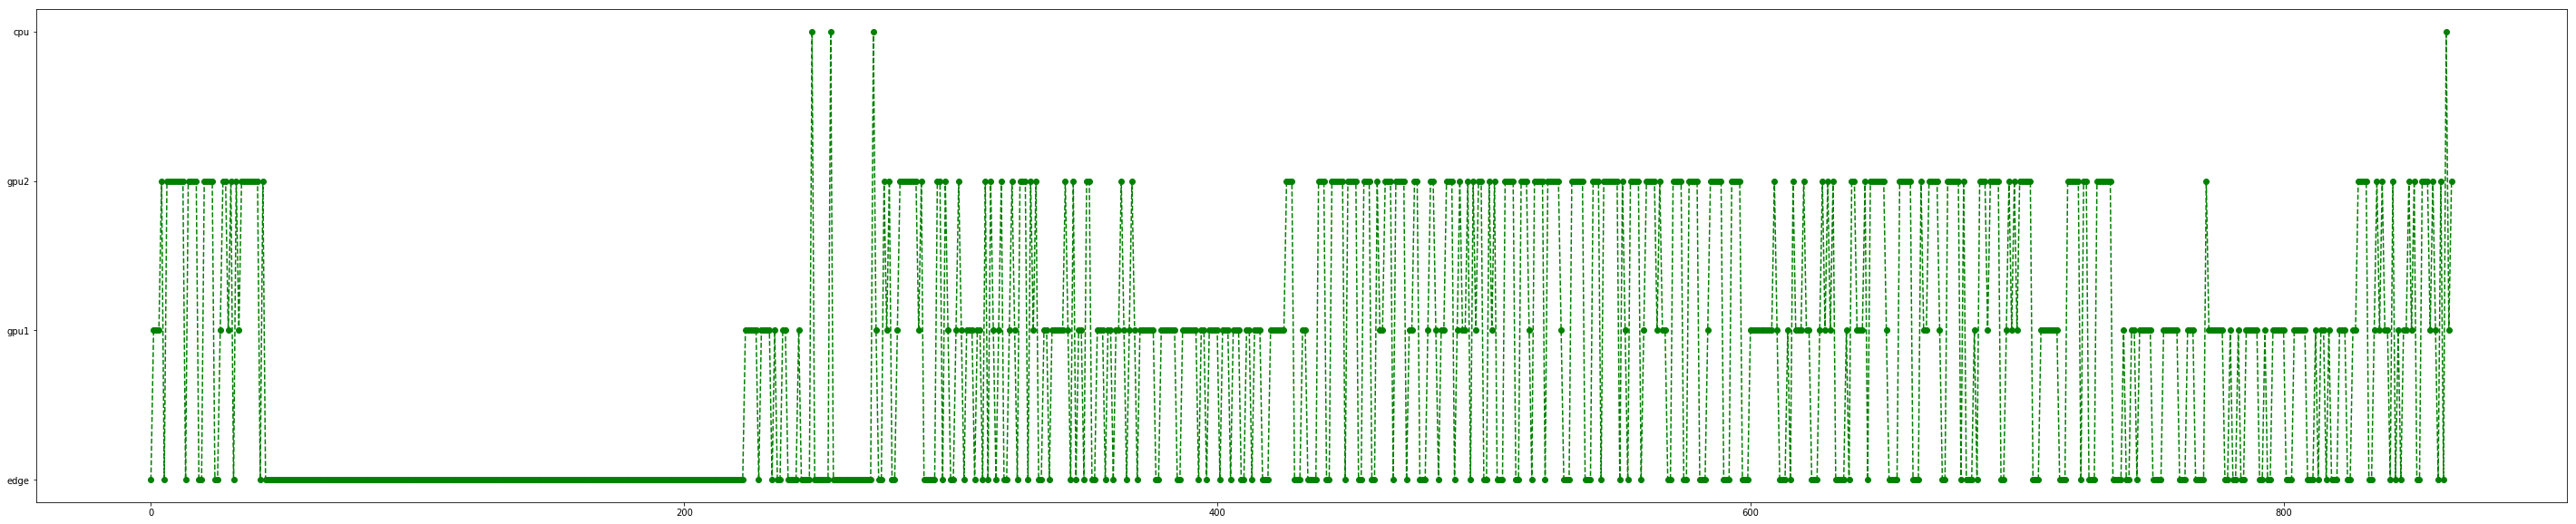

In [364]:
plt.figure(figsize=[50, 10])
plt.plot(df_stepExp['runtime'], "go--")

In [309]:
df_deploy = pd.read_csv("./deployTime.csv")

In [310]:
df_deploy.head()

,epoch,cpu,gpu1,gpu2
0,1580669411,27.521013,15.408365,12.440178
1,1580670075,27.434706,15.388592,12.427315
2,1580670761,18.432526,31.006113,27.445801
3,1580671417,21.438793,12.942915,12.446022
4,1580672103,36.496365,27.447964,12.417395


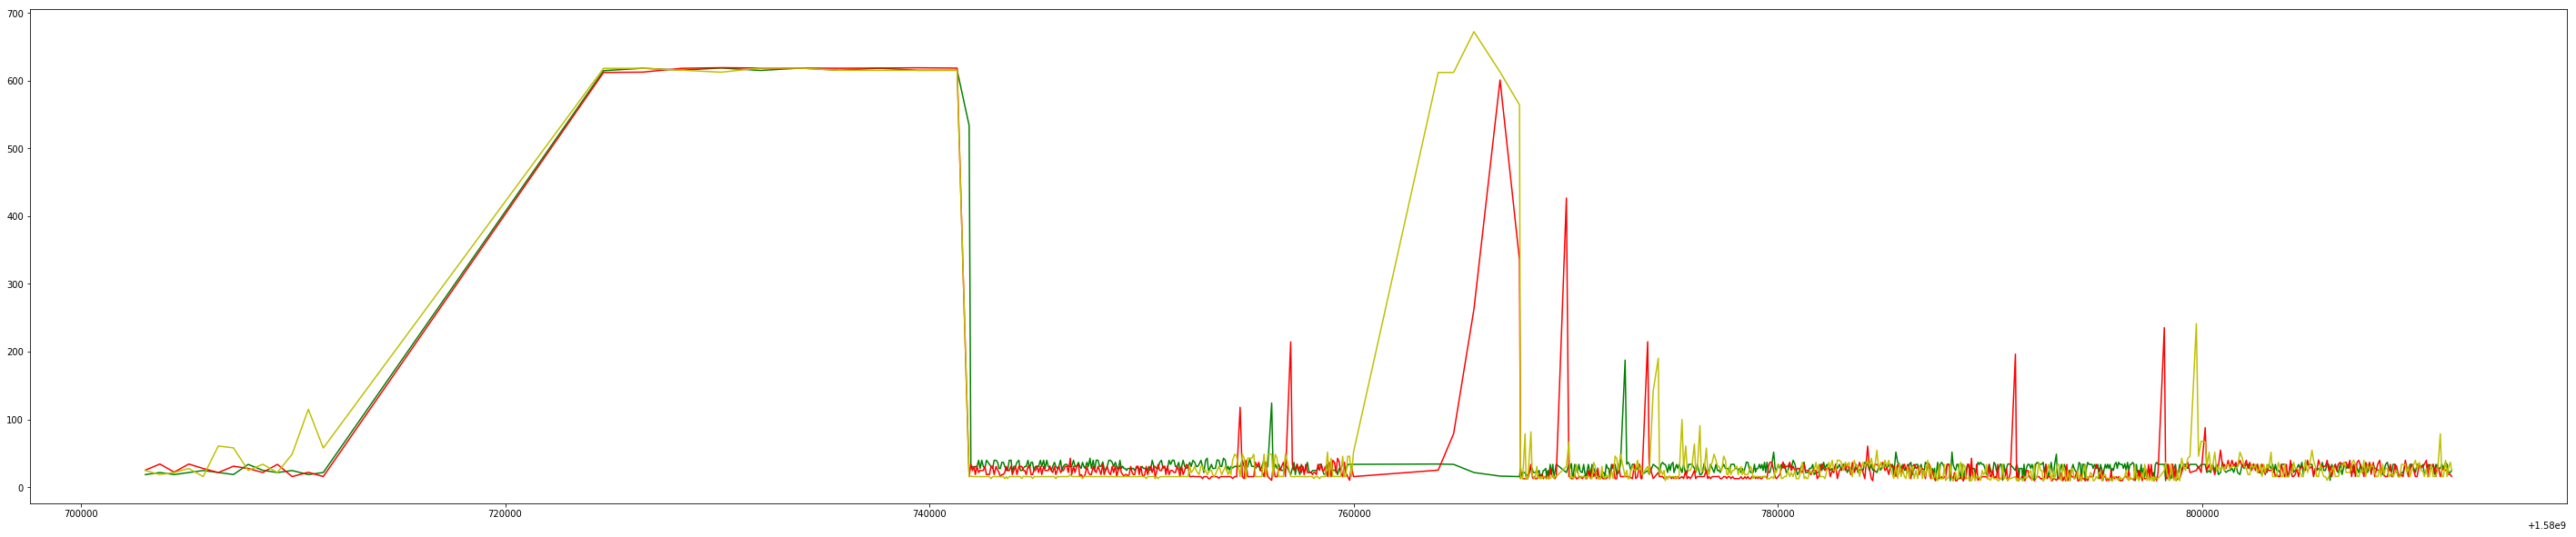

In [376]:
plt.figure(figsize=[50, 10])
plt.plot(df_deploy['epoch'][50:], df_deploy['cpu'][50:], "g")
plt.plot(df_deploy['epoch'][50:], df_deploy['gpu1'][50:], "r")
plt.plot(df_deploy['epoch'][50:], df_deploy['gpu2'][50:], "y")

In [316]:
def is_outlier(points, thresh=3.5):
    """
    Returns a boolean array with True if points are outliers and False 
    otherwise.

    Parameters:
    -----------
        points : An numobservations by numdimensions array of observations
        thresh : The modified z-score to use as a threshold. Observations with
            a modified z-score (based on the median absolute deviation) greater
            than this value will be classified as outliers.

    Returns:
    --------
        mask : A numobservations-length boolean array.

    References:
    ----------
        Boris Iglewicz and David Hoaglin (1993), "Volume 16: How to Detect and
        Handle Outliers", The ASQC Basic References in Quality Control:
        Statistical Techniques, Edward F. Mykytka, Ph.D., Editor. 
    """
    if len(points.shape) == 1:
        points = points[:,None]
    median = np.median(points, axis=0)
    diff = np.sum((points - median)**2, axis=-1)
    diff = np.sqrt(diff)
    med_abs_deviation = np.median(diff)

    modified_z_score = 0.6745 * diff / med_abs_deviation

    return modified_z_score > thresh

(array([ 39., 143., 308.,  12.,  38.,  45.,  88.,  10.,  25.,  59.]),
 array([ 9.32712936, 11.50944538, 13.6917614 , 15.87407742, 18.05639343,
        20.23870945, 22.42102547, 24.60334148, 26.7856575 , 28.96797352,
        31.15028954]),
 <a list of 10 Patch objects>)

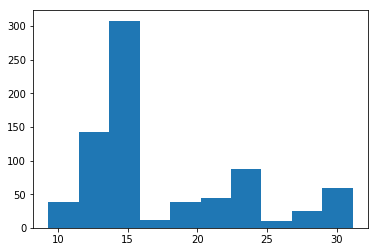

In [325]:
plt.hist(df_deploy['gpu2'][~is_outlier(df_deploy['gpu2'])], bins=10)

In [336]:
df_gpu2 = df_logtime4[:][df_logtime4['runtime']=='gpu2']

In [356]:
len(df_gpu2)

154

Text(0.5, 0, 'GPU1 Transfer Time (secs)')

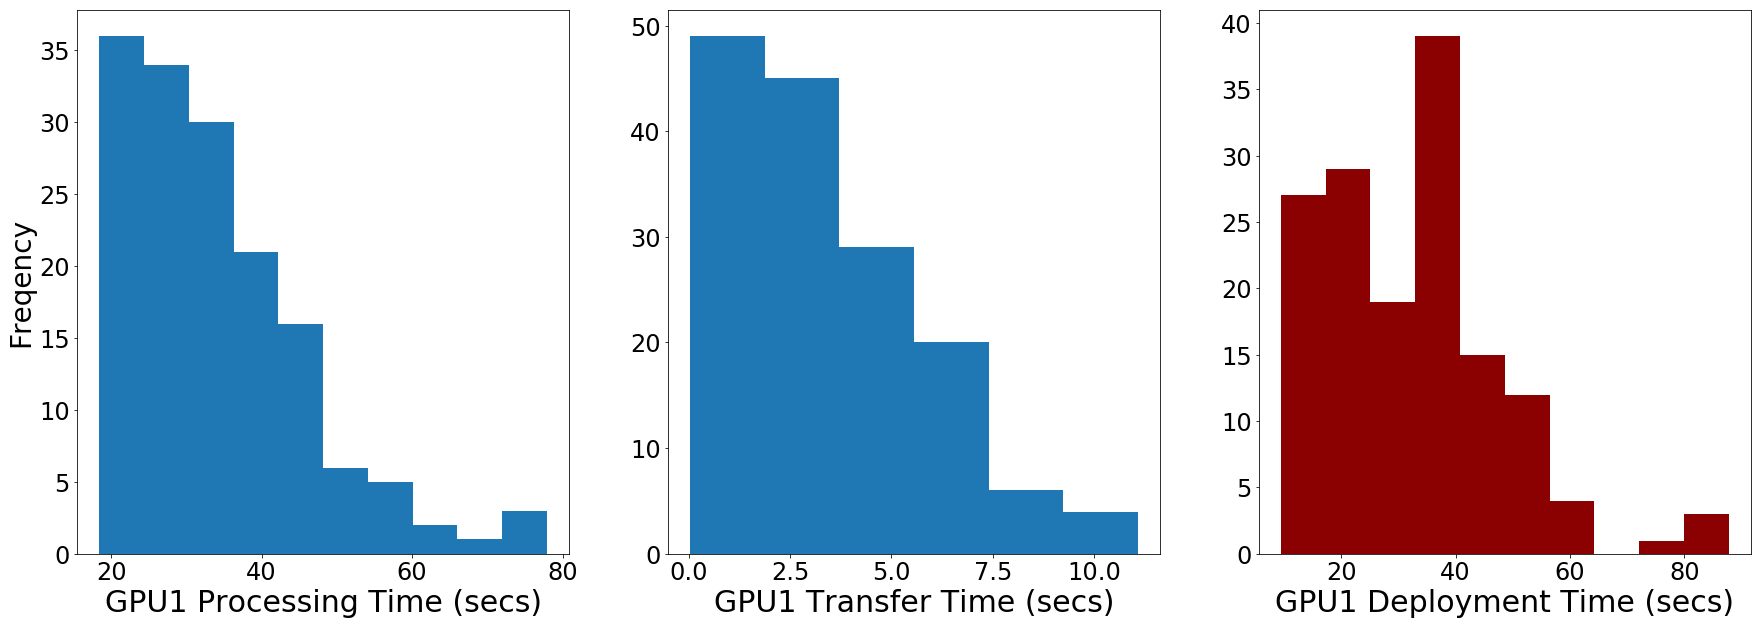

In [452]:
plt.figure(figsize=[30, 10])
# plt.title()
plt.subplot(133)
plt.hist(df_gpu2['act_deploy'][~is_outlier(df_gpu2['act_deploy'])], color="darkred")
plt.xlabel("GPU1 Deployment Time (secs)", fontsize=30)
# plt.ylabel("Freqency", fontsize=28)

plt.subplot(131)
plt.hist(df_gpu2['act_proc'])
# plt.title("GPU2 Processing Time Distribution")
plt.xlabel("GPU1 Processing Time (secs)", fontsize=30)
plt.ylabel("Freqency", fontsize=28)

plt.subplot(132)
plt.hist(df_gpu2['act_transfer'][~is_outlier(df_gpu2['act_transfer'])], bins=6)
# plt.title("GPU2 Runtime Transfer Time Distribution")
plt.xlabel("GPU1 Transfer Time (secs)", fontsize=30)
# plt.ylabel("Freqency", fontsize=28)

Text(0, 0.5, 'Freqency')

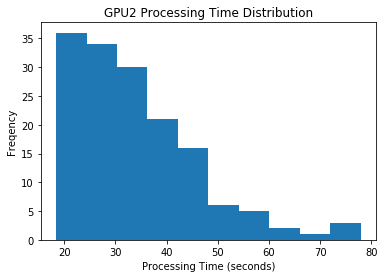

Text(0, 0.5, 'Freqency')

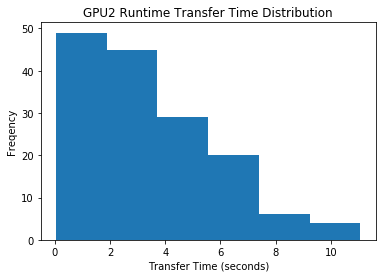

In [355]:
plt.hist(df_gpu2['act_transfer'][~is_outlier(df_gpu2['act_transfer'])], bins=6)
plt.title("GPU2 Runtime Transfer Time Distribution")
plt.xlabel("Transfer Time (seconds)")
plt.ylabel("Freqency")

In [327]:
df_deploy.head()

,epoch,cpu,gpu1,gpu2
0,1580669411,27.521013,15.408365,12.440178
1,1580670075,27.434706,15.388592,12.427315
2,1580670761,18.432526,31.006113,27.445801
3,1580671417,21.438793,12.942915,12.446022
4,1580672103,36.496365,27.447964,12.417395


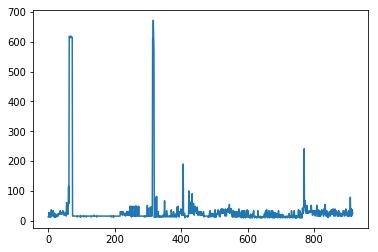

In [320]:
plt.plot(df_deploy['gpu2'])

In [402]:
df_5runtimes = pd.read_csv("./logTime_5runtimes.csv")

In [403]:
df_5runtimes.tail()

,epoch,image_num,runtime,pred_total,pred_transfer,pred_deploy,pred_proc,act_total,act_transfer,act_deploy,act_proc
460,1580930453,108,edge,167.415192,0.0,0.0,167.415192,171.010162,0.00000,0.000000,171.010162
461,1580930681,108,cpu,167.415192,0.0,0.0,167.415192,199.760468,7.42624,19.018217,180.742249
462,1580930796,108,gpu1,167.415192,0.0,0.0,167.415192,83.113625,7.42624,36.506241,46.607384
463,1580930969,108,gpu2,167.415192,0.0,0.0,167.415192,136.036057,7.42624,96.775017,39.261047
464,1580931138,108,edge,167.415192,0.0,0.0,167.415192,168.131317,0.00000,0.000000,168.131317


In [404]:
stoic_selection = df_5runtimes.iloc[4::5, :]
stoic_selection.reset_index(inplace=True)
stoic_selection.head()

,index,epoch,image_num,runtime,pred_total,pred_transfer,pred_deploy,pred_proc,act_total,act_transfer,act_deploy,act_proc
0,4,1580669502,11,edge,19.585865,0.000000,0.000000,19.585865,20.114408,0.000000,0.000000,20.114408
1,9,1580670280,130,gpu1,75.452255,3.316329,21.786476,50.349449,85.408501,3.316329,24.433670,60.974834
2,14,1580671071,174,gpu1,88.162506,9.435568,21.786476,56.940460,62.362816,9.435568,12.408023,49.954796
3,19,1580671578,56,gpu1,59.175488,1.612295,21.786476,35.776718,71.661171,1.612295,30.473028,41.188141
4,24,1580672078,66,gpu2,56.336933,3.848197,24.391193,28.097542,48.353252,3.848197,16.023445,32.329807


In [405]:
runtimes = []
for index in range(0, len(df_5runtimes), 5):
    minTime = float("inf")
    runtime = ""
    for i in range(index, index + 4):
        if (df_logtime4[i: i+1]["act_total"].item() < minTime):
            minTime = df_logtime4[i: i + 1]["act_total"].item()
            runtime = df_logtime4[i: i + 1]["runtime"].item()
    runtimes.append(runtime)
    

In [406]:
groundtruth_runtimes = pd.Series(runtimes)
stoic_runtimes = stoic_selection["runtime"]
positive = stoic_runtimes[stoic_runtimes == groundtruth_runtimes]
len(positive) / len(df_stoic_front)

0.17567567567567569

In [413]:
df_5runtimes

,epoch,image_num,runtime,pred_total,pred_transfer,pred_deploy,pred_proc,act_total,act_transfer,act_deploy,act_proc
0,1580669108,11,edge,19.585900,0.000000,0.000000,19.585900,20.105900,0.000000,0.000000,20.105900
1,1580669296,11,cpu,19.585865,0.000000,0.000000,19.585865,59.798576,0.291945,37.095196,22.703381
2,1580669397,11,gpu1,19.585865,0.000000,0.000000,19.585865,57.866310,0.291945,30.468649,27.397663
3,1580669482,11,gpu2,19.585865,0.000000,0.000000,19.585865,50.184010,0.291945,30.472416,19.711596
4,1580669502,11,edge,19.585865,0.000000,0.000000,19.585865,20.114408,0.000000,0.000000,20.114408
5,1580669712,130,edge,75.452255,3.316329,21.786476,50.349449,206.135529,0.000000,0.000000,206.135529
6,1580669928,130,cpu,75.452255,3.316329,21.786476,50.349449,187.997070,3.316329,21.524399,166.472672
7,1580670062,130,gpu1,75.452255,3.316329,21.786476,50.349449,92.641075,3.316329,31.032087,61.608986
8,1580670153,130,gpu2,75.452255,3.316329,21.786476,50.349449,56.142815,3.316329,21.452150,34.690662
9,1580670280,130,gpu1,75.452255,3.316329,21.786476,50.349449,85.408501,3.316329,24.433670,60.974834


In [398]:
print (stoic_runtimes)

0     edge
1     gpu1
2     gpu1
3     gpu1
4     gpu2
5     edge
6     gpu2
7     gpu2
8     gpu2
9     gpu2
10    gpu2
11    gpu2
12    gpu2
13    edge
14    gpu2
15    gpu2
16    gpu2
17    gpu2
18    edge
19    edge
20    gpu2
21    gpu2
22    gpu2
23    gpu2
24    edge
25    edge
26    gpu1
27    gpu2
28    gpu2
29    gpu1
30    gpu2
31    edge
32    gpu2
33    gpu1
34    gpu2
35    gpu2
36    gpu2
37    gpu2
38    gpu2
39    gpu2
40    gpu2
41    edge
42    gpu2
43    edge
44    edge
45    edge
Name: runtime, dtype: object


In [ ]:
# df = pd.read_csv("./logTime_4runtimes_5.csv")
# for index in range(0, len(df)):
#     df['epoch'][index] += random.randint(0, 3)
# df.to_csv("./logTime4.csv", index=False)

### Prediction Analysis

In [40]:
df_4runtimes = pd.read_csv("./logTime_4runtimes_3.csv")

In [11]:
pd.set_option('display.max_rows', None)
df_4runtimes[['image_num', 'runtime', 'act_total']]

,image_num,runtime,act_total
0,11,edge,19.995800
1,11,cpu,44.667328
2,11,gpu1,53.070518
3,11,gpu2,632.807739
4,130,gpu1,77.683990
5,130,gpu2,52.840115
6,130,edge,203.611328
7,130,cpu,191.395538
8,174,edge,236.629059
9,174,cpu,237.234329


In [41]:
df_gpu1 = df_4runtimes[df_4runtimes['runtime']=='gpu1']
df_gpu2 = df_4runtimes[df_4runtimes['runtime']=='gpu2']

In [35]:
def regress(df, title):
    df = df[['image_num', 'act_proc']]
    X = df.iloc[:, 0].values.reshape(-1, 1)
    Y = df.iloc[:, 1].values.reshape(-1, 1)
    linear_regressor = LinearRegression()
    linear_regressor.fit(X, Y)
    Y_pred = linear_regressor.predict(X)
    plt.title(title)
    plt.xlabel("image_num")
    plt.ylabel("latency (seconds)")
    plt.scatter(X, Y)
    plt.plot(X, Y_pred, color='red')
    plt.show()

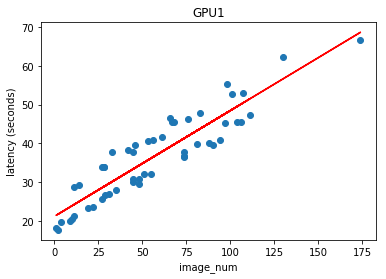

In [42]:
regress(df_gpu1, "GPU1")

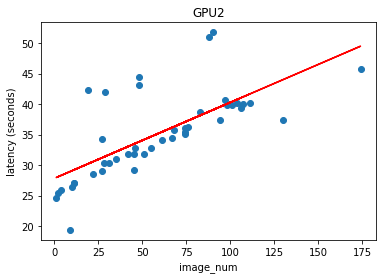

In [43]:
regress(df_gpu2, "GPU2")

In [44]:
df_gpu2

,epoch,image_num,runtime,pred_total,pred_transfer,pred_deploy,pred_proc,act_total,act_transfer,act_deploy,act_proc
3,1582099016,11,gpu2,61.033131,0.701747,33.469444,26.861938,632.807739,0.701747,605.728516,27.079184
5,1582099209,130,gpu2,90.518555,8.064269,36.443714,46.010574,52.840115,8.064269,15.431395,37.408718
11,1582100390,174,gpu2,126.914879,12.854503,72.648300,41.412075,94.235634,29.740669,48.518967,45.716671
36,1582104113,107,gpu2,134.682404,6.787917,90.694046,37.200443,91.520172,6.271014,51.571213,39.948956
40,1582104495,28,gpu2,122.165726,2.291007,90.694046,29.180670,90.848793,1.852558,60.581837,30.266960
44,1582104898,35,gpu2,129.819962,2.306750,97.354469,30.158743,103.731468,2.863759,72.658737,31.072727
48,1582105277,27,gpu2,130.300278,1.023659,99.817322,29.459297,113.683792,1.779493,84.615059,29.068733
52,1582105823,61,gpu2,134.878113,4.512116,97.354469,33.011528,152.042786,3.513117,117.932274,34.110512
56,1582106295,74,gpu2,137.007690,4.614164,97.354469,35.039062,69.539261,5.473715,33.491138,36.048119
60,1582106862,106,gpu2,143.653168,8.241710,97.354469,38.056988,66.769859,6.609479,27.415043,39.354816


### Concurrent Runtime

In [163]:
df_logtime4 = pd.read_csv("./logTime_4runtimes_5.csv")

In [307]:
sch_runtimes = []
act_runtimes = []
errors = []
edge_errors = []
errors_dict = {}
edge_counter = 0
for index in range(0, len(df_logtime4), 4):
    sch_minTime = float("inf")
    act_minTime = float("inf")
    sch_runtime = ""
    act_runtime = ""
    sch_index = 0
    act_index = 0
    for i in range(index, index + 4):
        if (df_logtime4[i: i+1]["pred_total"].item() < sch_minTime):
            sch_minTime = df_logtime4[i: i + 1]["pred_total"].item()
            sch_runtime = df_logtime4[i: i + 1]["runtime"].item()
            sch_index = i
        if (df_logtime4[i: i+1]["act_total"].item() < act_minTime):
            act_minTime = df_logtime4[i: i + 1]["act_total"].item()
            act_runtime = df_logtime4[i: i + 1]["runtime"].item()
            act_index = i
    if (sch_runtime != act_runtime):
#         print ("image_num: ", df_logtime4['image_num'][index])
#         print (df_logtime4.iloc[index, :])
#         print("sch_runtime : ", sch_runtime)
#         print("act_runtime : ", act_runtime)
#         print("sch_minTime : ", sch_minTime)
#         print("act_minTime : ", act_minTime)
        diff = abs(sch_minTime - act_minTime)
        errors.append(diff)
        errors_dict[diff] = df_logtime4['image_num'][index]
        if (sch_runtime == "edge" or act_runtime == 'edge'):
            print (df_logtime4[index:index+4])
            print ("sch_runtime:", sch_runtime)
            print ("act_runtime:", act_runtime)
            edge_counter += 1
            edge_errors.append(diff)
    sch_runtimes.append(sch_runtime)
    act_runtimes.append(act_runtime)

print ("Concurrency Runtime Accuracy : ", 1 - (edge_counter / len(sch_runtimes)))
print (errors_dict)


         epoch  image_num runtime  pred_total  pred_transfer  pred_deploy  \
24  1582605259         33    edge   53.660286        0.00000     0.000000   
25  1582605259         33     cpu   67.997627        1.95333    15.556298   
26  1582605259         33    gpu1   67.535820        1.95333    30.482620   
27  1582605259         33    gpu2   56.188946        3.41433    21.413853   

    pred_proc  act_total  act_transfer  act_deploy   act_proc  
24  53.660286  53.194176      0.000000    0.000000  53.194176  
25  50.487995  78.252487      2.685215   27.434433  50.818054  
26  35.099869  86.414429      2.685215   48.586967  37.827457  
27  56.188946  51.640202      2.026739   12.386320  39.253880  
sch_runtime: edge
act_runtime: gpu2
         epoch  image_num runtime  pred_total  pred_transfer  pred_deploy  \
48  1582607561         35    edge   59.466137       0.000000     0.000000   
49  1582607561         35     cpu   81.689667       2.863759    23.098803   
50  1582607561         35  

In [291]:
sorted_errors_dict = {k: v for k, v in sorted(errors_dict.items(), key=lambda item: item[1])}

In [298]:
pd.DataFrame.from_dict(errors_dict, orient="index", columns=["Image_Num"])

,Image_Num
44.165031,174
2.020084,33
7.053070,35
1.826500,88
18.410759,94
3.305389,76
12.240093,45
3.873363,42
16.754089,174
2.476482,107


In [266]:
print ("Wrong selection {0} out of {1}".format(len(errors), len(sch_runtimes)))
print ("Max error across wrong selections: ", max(errors))
print ("Min error across wrong selections: ", min(errors))
print ("Avg error across wrong selections: ", statistics.mean(errors))

Wrong selection 23 out of 154
Max error across wrong selections:  44.165031438
Min error across wrong selections:  1.3868141180000038
Avg error across wrong selections:  11.819242560391306


Text(0, 0.5, 'Freqency')

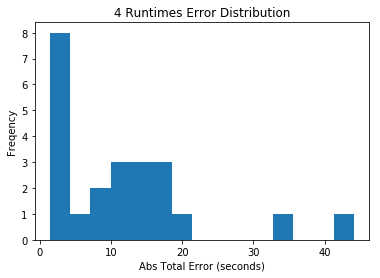

In [303]:
plt.hist(errors, bins=15)
plt.title("4 Runtimes Error Distribution")
plt.xlabel("Abs Total Error (seconds)")
plt.ylabel("Freqency")

In [267]:
print ("Wrong selection {0} out of {1}".format(len(edge_errors), len(sch_runtimes)))
print ("Max error across wrong selections: ", max(edge_errors))
print ("Min error across wrong selections: ", min(edge_errors))
print ("Avg error across wrong selections: ", statistics.mean(edge_errors))

Wrong selection 10 out of 154
Max error across wrong selections:  20.264568329
Min error across wrong selections:  1.3868141180000038
Avg error across wrong selections:  9.7578598021


Text(0, 0.5, 'Freqency')

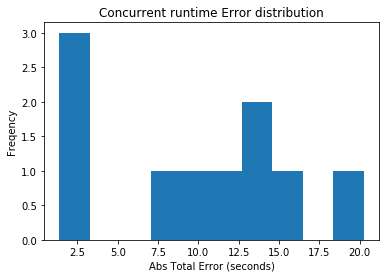

In [302]:
plt.hist(edge_errors)
plt.title("Concurrent runtime Error distribution")
plt.xlabel("Abs Total Error (seconds)")
plt.ylabel("Freqency")

In [300]:
counter = 0
for idx in range(len(sch_runtimes)):
    if sch_runtimes[idx] != act_runtimes[idx]:
        print (idx)
        counter += 1
print (1 - counter / len(runtimes))

2
6
12
27
30
36
37
42
53
60
61
62
63
67
77
98
107
113
129
131
132
149
150
0.8506493506493507


In [141]:
# Check if every execution has 4 rows
counter = 1
for index, row in df_logtime4.iterrows():
    if index % 4 == 0 and index != 0:
        counter += 1
        if row['image_num'] == df_logtime4['image_num'][index - 1]:
            print(index)
print ("Number of Execution: ", counter)

Number of Execution:  154


In [131]:
# Epoch Time sync
# for index, row in df_logtime4.iterrows():
#     if index % 4 == 0:
#         for offset in range(1, 4):
#             df_logtime4['epoch'][index + offset] = row['epoch']

# df_logtime4.to_csv('./logTime4.csv', index=False)

/Users/michaelzhang/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [138]:
# Parse client_log
runtime_re = re.compile("The task is scheduled at (.*)")
imagenum_re = re.compile("Start running task image-clf-inf version 2.2 on (\d*) images")
designated_runtimes = []
image_nums = []
with open("./client_log_final.txt", "r") as file:
    for line in file:
        runtime_match = runtime_re.search(line)
        imagenum_match = imagenum_re.search(line)
        if runtime_match != None:
            runtime = runtime_match.group(1)
            designated_runtimes.append(runtime.strip())
        if imagenum_match != None:
            imagenum = imagenum_match.group(1)
            image_nums.append(imagenum)

In [210]:
# MSE
print ("Total MSE : ", sum((df_logtime4["pred_total"] - df_logtime4["act_total"])**2) / len(df_logtime4))
# MAE
print ("Total MAE : ", sum(abs(df_logtime4["pred_total"] - df_logtime4["act_total"])) / len(df_logtime4))

# Deployment MSE
print ("Deployment time MSE: ", sum((df_logtime4["pred_deploy"] - df_logtime4["act_deploy"])**2) / len(df_logtime4))
# Deployment MAE
print ("Deployment time MAE: ",sum(abs(df_logtime4["pred_deploy"] - df_logtime4["act_deploy"])) / len(df_logtime4))

# Processing MSE
print ("Processing time MSE: ", sum((df_logtime4["pred_proc"] - df_logtime4["act_proc"])**2) / len(df_logtime4))
# Processing MAE
print ("Processing time MAE: ",sum(abs(df_logtime4["pred_proc"] - df_logtime4["act_proc"])) / len(df_logtime4))

Total MSE :  1486.7087871806184
Total MAE :  15.663863247843183
Deployment time MSE:  1188.602963330408
Deployment time MAE:  13.478752827743168
Processing time MSE:  217.29724908377423
Processing time MAE:  6.738604959304222


In [212]:
df_logtime4['act_total'].mean()

82.38287860341347

In [214]:
mse_arr = []
mae_arr = []
for idx, row in df_logtime4.iterrows():
    mse = (row["pred_total"] - row["act_total"])**2
    mse_arr.append(mse)
    mae = abs(row["pred_total"] - row["act_total"])
    mae_arr.append(mae)

In [217]:
mse_20 = []
mae_20 = []
mse_40 = []
mae_40 = []
mse_60 = []
mae_60 = []
mse_80 = []
mae_80 = []
mse_100 = []
mae_100 = []
mse_120 = []
mae_120 = []
mse_140 = []
mae_140 = []
mse_160 = []
mae_160 = []
mse_180 = []
mae_180 = []
for idx, row in df_logtime4.iterrows():
    mse = (row["pred_total"] - row["act_total"])**2
    mae = abs(row["pred_total"] - row["act_total"])
    if row['image_num'] >= 1 and row['image_num'] < 20:
        mse_20.append(mse)
        mae_20.append(mae)
    elif row['image_num'] >= 20 and row['image_num'] < 40:
        mse_40.append(mse)
        mae_40.append(mae)
    elif row['image_num'] >= 40 and row['image_num'] < 60:
        mse_60.append(mse)
        mae_60.append(mae)
    elif row['image_num'] >= 60 and row['image_num'] < 80:
        mse_80.append(mse)
        mae_80.append(mae)
    elif row['image_num'] >= 80 and row['image_num'] < 100:
        mse_100.append(mse)
        mae_100.append(mae)
    elif row['image_num'] >= 100 and row['image_num'] < 120:
        mse_120.append(mse)
        mae_120.append(mae)
    elif row['image_num'] >= 120 and row['image_num'] < 140:
        mse_140.append(mse)
        mae_140.append(mae)
    elif row['image_num'] >= 140 and row['image_num'] < 160:
        mse_160.append(mse)
        mae_160.append(mae)
    elif row['image_num'] >= 160 and row['image_num'] < 180:
        mse_180.append(mse)
        mae_180.append(mae)    

In [223]:
min_arr = []
max_arr = []
avg_arr = []
# print ("1-20 min mse : ", min(mse_20))
# print ("1-20 max mse : ", max(mse_20))
# print ("1-20 avg mse : ", statistics.mean(mse_20))
min_arr.append(min(mse_20))
max_arr.append(max(mse_20))
avg_arr.append(statistics.mean(mse_20))
# print ("20-40 min mse : ", min(mse_40))
# print ("20-40 max mse : ", max(mse_40))
# print ("20-40 avg mse : ", statistics.mean(mse_40))
min_arr.append(min(mse_40))
max_arr.append(max(mse_40))
avg_arr.append(statistics.mean(mse_40))
# print ("40-60 min mse : ", min(mse_60))
# print ("40-60 max mse : ", max(mse_60))
# print ("40-60 avg mse : ", statistics.mean(mse_60))
min_arr.append(min(mse_60))
max_arr.append(max(mse_60))
avg_arr.append(statistics.mean(mse_60))
# print ("60-80 min mse : ", min(mse_80))
# print ("60-80 max mse : ", max(mse_80))
# print ("60-80 avg mse : ", statistics.mean(mse_80))
min_arr.append(min(mse_80))
max_arr.append(max(mse_80))
avg_arr.append(statistics.mean(mse_80))
# print ("80-100 min mse : ", min(mse_100))
# print ("80-100 max mse : ", max(mse_100))
# print ("80-100 avg mse : ", statistics.mean(mse_100))
min_arr.append(min(mse_100))
max_arr.append(max(mse_100))
avg_arr.append(statistics.mean(mse_100))
# print ("100-120 min mse : ", min(mse_120))
# print ("100-120 max mse : ", max(mse_120))
# print ("100-120 avg mse : ", statistics.mean(mse_120))
min_arr.append(min(mse_120))
max_arr.append(max(mse_120))
avg_arr.append(statistics.mean(mse_120))
# print ("120-140 min mse : ", min(mse_140))
# print ("120-140 max mse : ", max(mse_140))
# print ("120-140 avg mse : ", statistics.mean(mse_140))
min_arr.append(min(mse_140))
max_arr.append(max(mse_140))
avg_arr.append(statistics.mean(mse_140))
# print ("140-160 min mse : ", min(mse_160))
# print ("140-160 max mse : ", max(mse_160))
# print ("140-160 avg mse : ", statistics.mean(mse_160))
min_arr.append(min(mse_160))
max_arr.append(max(mse_160))
avg_arr.append(statistics.mean(mse_160))
# print ("160-180 min mse : ", min(mse_180))
# print ("160-180 max mse : ", max(mse_180))
# print ("160-180 avg mse : ", statistics.mean(mse_180))
min_arr.append(min(mse_180))
max_arr.append(max(mse_180))
avg_arr.append(statistics.mean(mse_180))

Text(0, 0.5, 'Avg MSE (seconds^2)')

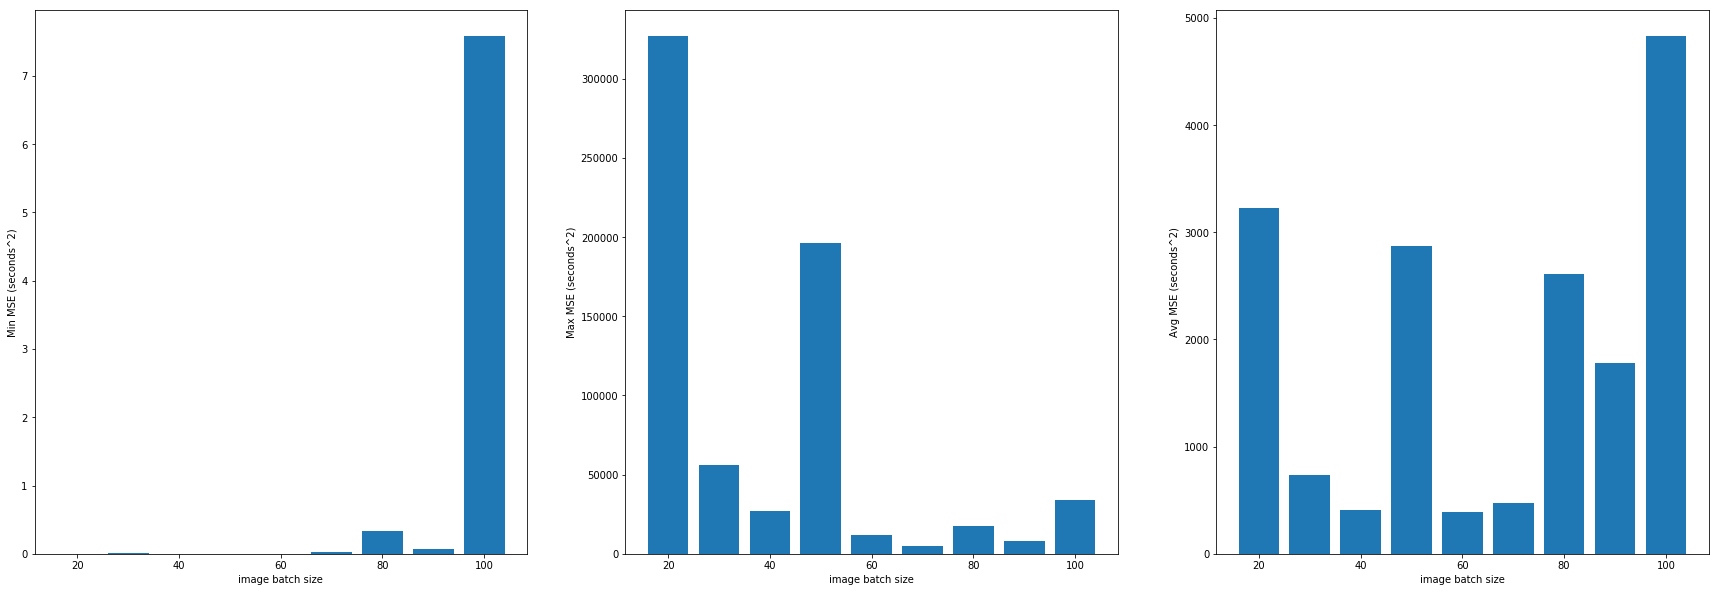

In [257]:
fig= plt.figure(figsize=[30, 10])
x = np.arange(9)

ax1 = fig.add_subplot(131)
ax1.bar(x, min_arr)
ax1.set_xticklabels(['0', '20', '40', '60', '80', '100', '120', '140', '160', '180'])
ax1.set_xlabel("image batch size")
ax1.set_ylabel("Min MSE (seconds^2)")

ax2 = fig.add_subplot(132)
ax2.bar(x, max_arr)
ax2.set_xticklabels(['0', '20', '40', '60', '80', '100', '120', '140', '160', '180'])
ax2.set_xlabel("image batch size")
ax2.set_ylabel("Max MSE (seconds^2)")

ax3 = fig.add_subplot(133)
ax3.bar(x, avg_arr)
ax3.set_xticklabels(['0', '20', '40', '60', '80', '100', '120', '140', '160', '180'])
ax3.set_xlabel("image batch size")
ax3.set_ylabel("Avg MSE (seconds^2)")


In [259]:
mae_min_arr = []
mae_max_arr = []
mae_avg_arr = []
# print ("1-20 min mae : ", min(mae_20))
# print ("1-20 max mae : ", max(mae_20))
# print ("1-20 avg mae : ", statistics.mean(mae_20))
mae_min_arr.append(min(mae_20))
mae_max_arr.append(max(mae_20))
mae_avg_arr.append(statistics.mean(mae_20))
# print ("20-40 min mae : ", min(mae_40))
# print ("20-40 max mae : ", max(mae_40))
# print ("20-40 avg mae : ", statistics.mean(mae_40))
mae_min_arr.append(min(mae_40))
mae_max_arr.append(max(mae_40))
mae_avg_arr.append(statistics.mean(mae_40))
# print ("40-60 min mae : ", min(mae_60))
# print ("40-60 max mae : ", max(mae_60))
# print ("40-60 avg mae : ", statistics.mean(mae_60))
mae_min_arr.append(min(mae_60))
mae_max_arr.append(max(mae_60))
mae_avg_arr.append(statistics.mean(mae_60))
# print ("60-80 min mae : ", min(mae_80))
# print ("60-80 max mae : ", max(mae_80))
# print ("60-80 avg mae : ", statistics.mean(mae_80))
mae_min_arr.append(min(mae_80))
mae_max_arr.append(max(mae_80))
mae_avg_arr.append(statistics.mean(mae_80))
# print ("80-100 min mae : ", min(mae_100))
# print ("80-100 max mae : ", max(mae_100))
# print ("80-100 avg mae : ", statistics.mean(mae_100))
mae_min_arr.append(min(mae_100))
mae_max_arr.append(max(mae_100))
mae_avg_arr.append(statistics.mean(mae_100))
# print ("100-120 min mae : ", min(mae_120))
# print ("100-120 max mae : ", max(mae_120))
# print ("100-120 avg mae : ", statistics.mean(mae_120))
mae_min_arr.append(min(mae_120))
mae_max_arr.append(max(mae_120))
mae_avg_arr.append(statistics.mean(mae_120))
# print ("120-140 min mae : ", min(mae_140))
# print ("120-140 max mae : ", max(mae_140))
# print ("120-140 avg mae : ", statistics.mean(mae_140))
mae_min_arr.append(min(mae_140))
mae_max_arr.append(max(mae_140))
mae_avg_arr.append(statistics.mean(mae_140))
# print ("140-160 min mae : ", min(mae_160))
# print ("140-160 max mae : ", max(mae_160))
# print ("140-160 avg mae : ", statistics.mean(mae_160))
mae_min_arr.append(min(mae_160))
mae_max_arr.append(max(mae_160))
mae_avg_arr.append(statistics.mean(mae_160))
# print ("160-180 min mae : ", min(mae_180))
# print ("160-180 max mae : ", max(mae_180))
# print ("160-180 avg mae : ", statistics.mean(mae_180))
mae_min_arr.append(min(mae_180))
mae_max_arr.append(max(mae_180))
mae_avg_arr.append(statistics.mean(mae_180))

Text(0, 0.5, 'Avg MAE (seconds)')

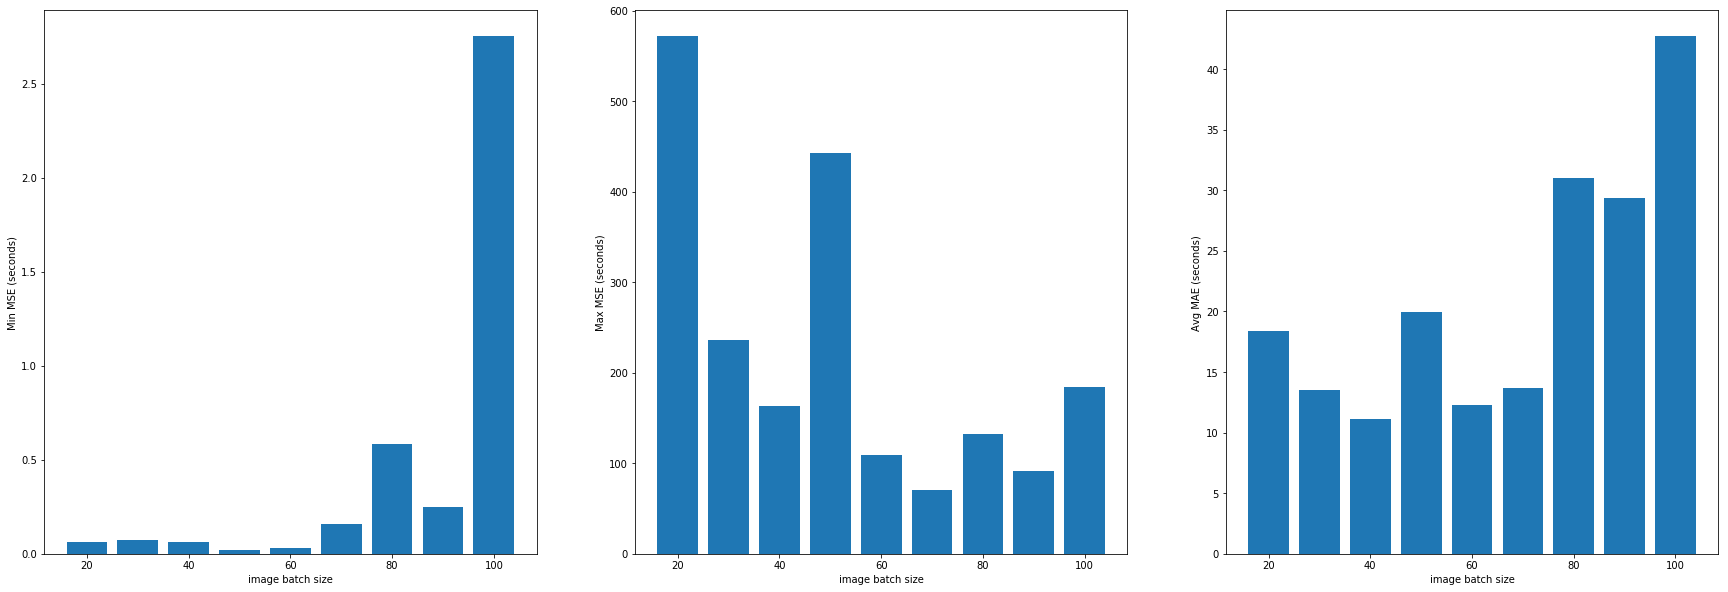

In [262]:
fig= plt.figure(figsize=[30, 10])
x = np.arange(9)

ax1 = fig.add_subplot(131)
ax1.bar(x, mae_min_arr)
ax1.set_xticklabels(['0', '20', '40', '60', '80', '100', '120', '140', '160', '180'])
ax1.set_xlabel("image batch size")
ax1.set_ylabel("Min MSE (seconds)")

ax2 = fig.add_subplot(132)
ax2.bar(x, mae_max_arr)
ax2.set_xticklabels(['0', '20', '40', '60', '80', '100', '120', '140', '160', '180'])
ax2.set_xlabel("image batch size")
ax2.set_ylabel("Max MSE (seconds)")

ax3 = fig.add_subplot(133)
ax3.bar(x, mae_avg_arr)
ax3.set_xticklabels(['0', '20', '40', '60', '80', '100', '120', '140', '160', '180'])
ax3.set_xlabel("image batch size")
ax3.set_ylabel("Avg MAE (seconds)")


In [321]:
df_logtime4.columns

Index(['epoch', 'image_num', 'runtime', 'pred_total', 'pred_transfer',
       'pred_deploy', 'pred_proc', 'act_total', 'act_transfer', 'act_deploy',
       'act_proc'],
      dtype='object')

In [322]:
df_logtime4['act_deploy'][df_logtime4]

0        0.000000
1       18.414816
2       24.436247
3      605.728516
4       15.407279
5       15.431395
6        0.000000
7       33.391582
8        0.000000
9       69.560654
10      15.964262
11      48.518967
12       0.000000
13      21.436836
14      15.402798
15      21.402699
16       0.000000
17      25.035683
18       3.624908
19       9.440986
20       0.000000
21      21.355001
22      40.087494
23      12.379175
24       0.000000
25      27.434433
26      48.586967
27      12.386320
28      48.528145
29       0.000000
30      34.053082
31       9.432319
32      15.464455
33      36.521446
34       0.000000
35      15.472479
36       0.000000
37      18.366070
38      24.468672
39      12.424083
40       0.000000
41      24.468201
42      33.475536
43      51.571213
44       0.000000
45      24.450874
46      27.435963
47      60.581837
48       0.000000
49      23.302135
50      24.451807
51      72.658737
52       0.000000
53      21.424467
54      24.447371
55      84

### GPU1 analysis

In [456]:
df_gpu1 = pd.read_csv("./logTime_gpu1.csv")

In [491]:
sum(df_gpu1['act_total'])

4430.580039980998

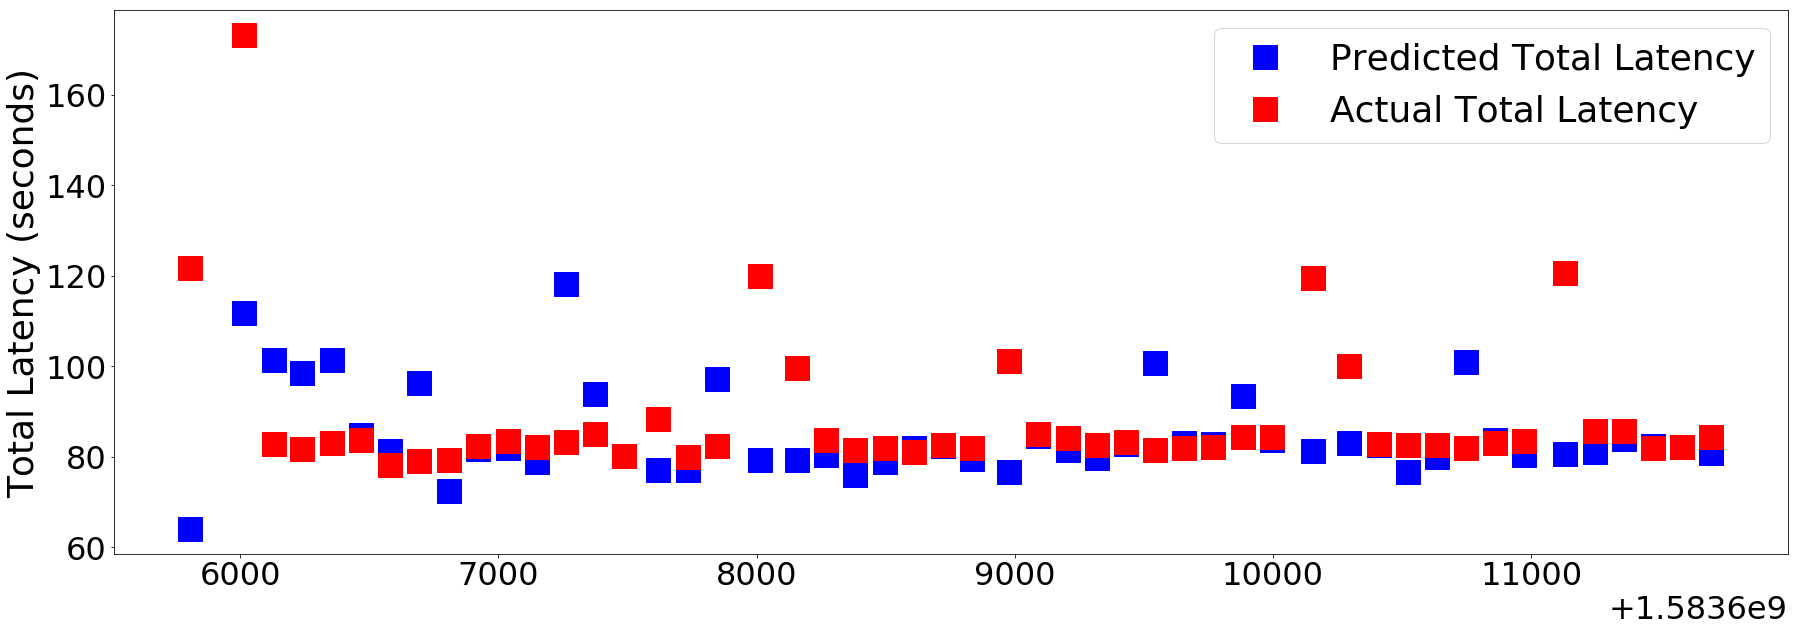

In [513]:
plt.figure(figsize=[30, 10])
plt.ylabel("Total Latency (seconds)", fontsize=36)
plt.plot(df_gpu1['epoch'], df_gpu1['pred_total'], "bs", markersize=24)
plt.plot(df_gpu1['epoch'], df_gpu1['act_total'], "rs", markersize=24)
plt.legend(["Predicted Total Latency", "Actual Total Latency"], fontsize=36)

88.61160079961999

In [531]:
df_gpu1_1 = df_gpu1[0:25]
df_gpu1_2 = df_gpu1[25:50]


In [524]:
def func(df_gpu1):
    act_mean = df_gpu1['act_total'].mean()
    act_deploy = df_gpu1['act_deploy'].mean()
    act_proc = df_gpu1['act_proc'].mean()
    print ((abs(df_gpu1['act_total'] - df_gpu1['pred_total'])).mean() / act_mean)
    print ((abs(df_gpu1['act_deploy'] - df_gpu1['pred_deploy'])).mean() / act_deploy)
    print ((abs(df_gpu1['act_proc'] - df_gpu1['pred_proc'])).mean() / act_proc)

In [532]:
func(df_gpu1_1)

0.1575721723015546
0.42710786017923175
0.11198777345369726


In [533]:
func(df_gpu1_2)

0.09206858773216366
0.2926430751051572
0.05321547105671363


Text(0.5, 0, 'GPU1 Transfer Time (secs)')

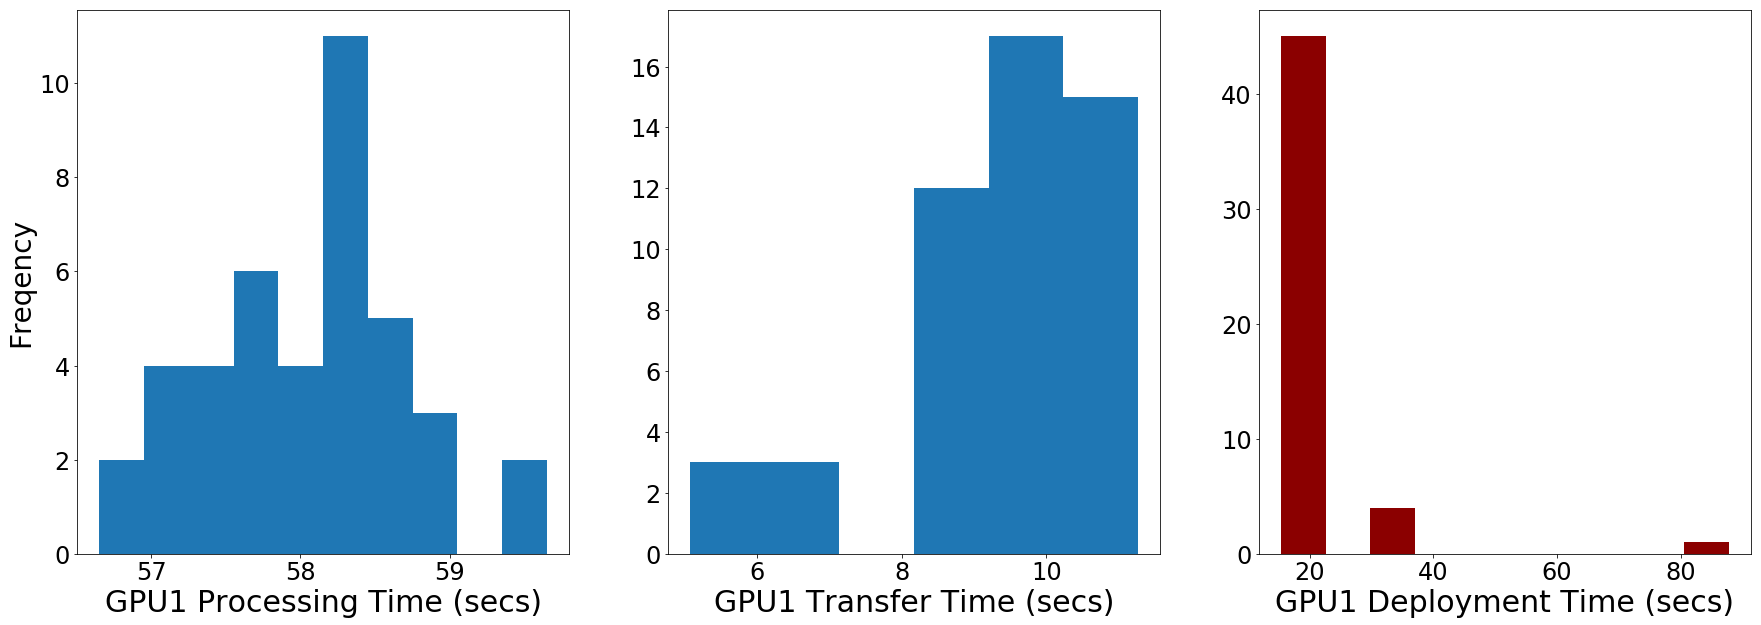

In [488]:
plt.figure(figsize=[30, 10])
# plt.title()
plt.subplot(133)
# plt.hist(df_gpu1['act_deploy'][~is_outlier(df_gpu1['act_deploy'])], color="darkred")
plt.hist(df_gpu1['act_deploy'], bins = 10, color="darkred")
plt.xlabel("GPU1 Deployment Time (secs)", fontsize=30)
# plt.ylabel("Freqency", fontsize=28)

plt.subplot(131)
# plt.hist(df_gpu1['act_proc'])
plt.hist(df_gpu1['act_proc'][~is_outlier(df_gpu1['act_proc'])], bins = 10)
# plt.title("GPU2 Processing Time Distribution")
plt.xlabel("GPU1 Processing Time (secs)", fontsize=30)
plt.ylabel("Freqency", fontsize=28)

plt.subplot(132)
# plt.hist(df_gpu1['act_transfer'][~is_outlier(df_gpu1['act_transfer'])], bins=6)
plt.hist(df_gpu1['act_transfer'], bins = 6)
# plt.title("GPU2 Runtime Transfer Time Distribution")
plt.xlabel("GPU1 Transfer Time (secs)", fontsize=30)
# plt.ylabel("Freqency", fontsize=28)